<a href="https://colab.research.google.com/github/luizleroy/predictive_analytics/blob/develop/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction to Predictive Analysis with Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href=""><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/luizleroy/predictive_analytics/blob/develop/new.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab! I will get a quick introduction to the Analysis with Colab and Python to Predictive Analysis.

Colab is a Python development environment that runs in the browser using Google Cloud.

Agora, vamos na língua de Camões mesmo, hehehe. Pois, po principal objetivo aqui é criar insumos, 'pedaços' de código mesmo, para utilizar em projetos de P&D.

# Imports

In [1]:
#!pip install sklearn

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt

# Dados de entrada - Quarteto de Anscombe

In [2]:
data = pd.read_json('sample_data/anscombe.json')


In [4]:
input_data = data['X']
output_data = data['Y']
X1 = input_data[0:11]
Y1 = output_data[0:11].values
Y2 = output_data[11:22].values
Y3 = output_data[22:33].values

X4 = input_data[33:44].values
Y4 = output_data[33:44].values
ascombe = {
            "Y": X1,
            "X1":Y1,
            "X2":Y2,
            "X3":Y3,
            "X4":X4,
            "Y4":Y4,
}
data_para_treinamento_ascombe = pd.DataFrame(ascombe)
print(data_para_treinamento_ascombe)
print('-----------------------------------------------------------------------')
data_para_treinamento_ascombe.describe()

     Y     X1    X2     X3  X4     Y4
0   10   8.04  9.14   7.46   8   6.58
1    8   6.95  8.14   6.77   8   5.76
2   13   7.58  8.74  12.74   8   7.71
3    9   8.81  8.77   7.11   8   8.84
4   11   8.33  9.26   7.81   8   8.47
5   14   9.96  8.10   8.84   8   7.04
6    6   7.24  6.13   6.08   8   5.25
7    4   4.26  3.10   5.39  19  12.50
8   12  10.84  9.13   8.15   8   5.56
9    7   4.81  7.26   6.42   8   7.91
10   5   5.68  4.74   5.73   8   6.89
-----------------------------------------------------------------------


,Y,X1,X2,X3,X4,Y4
count,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.50000,7.500909,7.500000,9.000000,7.500909
std,3.316625,2.03289,2.031657,2.030424,3.316625,2.030579
min,4.000000,4.26000,3.100000,5.390000,8.000000,5.250000
25%,6.500000,6.31500,6.695000,6.250000,8.000000,6.170000
50%,9.000000,7.58000,8.140000,7.110000,8.000000,7.040000
75%,11.500000,8.57000,8.950000,7.980000,8.000000,8.190000
max,14.000000,10.84000,9.260000,12.740000,19.000000,12.500000


# TODO_TEST Normalização (apenas para dados reais)

X - input
[[ 8.04  9.14  7.46  8.    6.58]
 [ 6.95  8.14  6.77  8.    5.76]
 [ 7.58  8.74 12.74  8.    7.71]
 [ 8.81  8.77  7.11  8.    8.84]
 [ 8.33  9.26  7.81  8.    8.47]
 [ 9.96  8.1   8.84  8.    7.04]
 [ 7.24  6.13  6.08  8.    5.25]
 [ 4.26  3.1   5.39 19.   12.5 ]
 [10.84  9.13  8.15  8.    5.56]
 [ 4.81  7.26  6.42  8.    7.91]
 [ 5.68  4.74  5.73  8.    6.89]]
Y - output
[10  8 13  9 11 14  6  4 12  7  5]


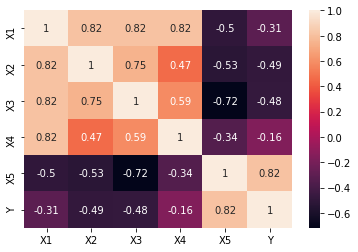

In [5]:
# y = data_para_treinamento_ascombe.iloc[:,0]
# x = data_para_treinamento_ascombe.iloc[:,1:6].values
# print('X - input')
# print(x)
# print('Y - output')
# print(y.values)

# #TODO
# scaler = StandardScaler()
# fit = scaler.fit_transform(data_para_treinamento_ascombe)


# df = pd.DataFrame(fit,columns=['X1','X2','X3','X4','X5', 'Y'])
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()



```
# Isto está formatado como código
```

Matriz simétrica **R**,
\begin{equation} \bf{R} = \begin{bmatrix} 
r_{11} = 1 & r_{12} & r_{13} & · · · & r_{1p} 
\\ r_{21}& r_{22} = 1  & r_{23} & · · · & r_{2p} 
\\ r_{31} & r_{32} & r_{33}  = 1 & · · · & r_{3p} 
\\ · · · & · · · & · · · & · · · & · · ·
\\ r_{p1} & r_{p2} & r_{p3} & · · · & r_{pp} = 1 
\end{bmatrix}, \end{equation}

onde cada valor acima é a correlação calculada (na fórmula abaixo) entre os vetores **x** de {1,2, ...,p},

\begin{equation*}
  r_{jk} =
  \frac{ \sum_{i=1}^{n}(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k) }{%
        \sqrt{\sum_{i=1}^{n}(x_{ij}-\bar{x}_j)^2}\sqrt{\sum_{i=1}^{n}(x_{ik}-\bar{x}_k)^2}}.
\end{equation*}


# TODO Regressão Logística